# Sujet 7 : Autour du SARS-CoV-2 (COVID-19)

Le but est ici de reproduire des graphes semblables à ceux du South China Morning Post (SCMP), sur la page The Coronavirus Pandemic et qui montrent pour différents pays le nombre cumulé (c'est-à-dire le nombre total de cas depuis le début de l'épidémie) de personnes atteintes de la maladie à coronavirus 2019.

Les données utilisées pour cet excercice proviennent du [Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)](https://systems.jhu.edu/). 

On commence par charger les données, qui ont été mises à disposition sur GitHub :

In [1]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

Si jamais l'url a été modifié, on preferera travailler sur une copie locale des fichiers.

In [2]:
data_file = "time_series_covid19_confirmed_global.csv.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Le fichier présente des séries temporelles du nombre de décès dus au covid dans 288 régions du monde. Les données concernent une période temporelle s'étalant entre le 22 janvier 2020 et le 09 mars 2023. Il est au format csv et est organisé comme suit :

| colonne 1 | colonne 2 | colonne 3 | colonne 4 | colonnes 5 à 1147 |
|---    |:-:    |:-:    |:-:    |--:    |
| Province/State | Country/Region | Latitude | Longitude | date format dd/mm/yy |

Pour charger les données, on utilise la librairie pandas, que l'on doit importer.
La première ligne du document renseigne les intitulés des différentes colonnes qui nous sera utile pour recuperer les donnes qui nous interesse, donc on la charge grace à la commande skiprows=0.

In [3]:
import pandas as pd

data=pd.read_csv(data_url,skiprows=0)

On vérifie s'il existe des points manquant dans ce jeu de données. Pour cela, on vérifie d'abord que toutes les lignes sont associées à un pays, et que les nombres de décès ont bien été recensés pour toutes les dates : 

In [4]:
data[data['Country/Region'].isna()]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

[0 rows x 1147 columns]

Les lignes sont bien bien associées à des pays ou régions.

In [5]:
liste_dates=list(data.columns[4:])
for i in range(len(liste_dates)) :
    data[data[liste_dates[i]].isnull()]

Il semble qu'aucune donnée nécéssaire à notre étude ne soit manquante, on peut donc charger à nouveau le fichier en s'affranchissant des intitulés de colonnes.

On commence par réorganiser la dataframe selon nos besoins, c'est-à-dire écrire d'abord la colonne des pays, puis des régions, et éliminer les données de latitude et longitude.

In [7]:
data=data.reindex(['Country/Region','Province/State']+liste_dates,axis=1)

On récupère ensuite les données qui nous intéresse pour chaque pays. Pour les pays sans province/state on peut récupérer les données directement mais pour les pays dont on ne considère par les territoires d'outre-mer, on prend uniquement la dernière ligne correspondante, soit le maximum des indices.
Pour la Chine, on extrait l'indice de ligne correspondant à Hong Kong pour ne pas compter ces données en double. La fonction sum() permet enfin de sommer sur toutes les autres provinces de Chine.

In [8]:
dataBel=data.iloc[max(data.loc[data['Country/Region'] == 'Belgium'].index),2:]
dataHK=data.iloc[max(data.loc[data['Province/State']=='Hong Kong'].index),2:]
dataFra=data.iloc[max(data.loc[data['Country/Region'] == 'France'].index),2:]
dataGer=data.iloc[max(data.loc[data['Country/Region'] == 'Germany'].index),2:]
dataIra=data.iloc[max(data.loc[data['Country/Region'] == 'Iran'].index),2:]
dataIta=data.iloc[max(data.loc[data['Country/Region'] == 'Italy'].index),2:]
dataJap=data.iloc[max(data.loc[data['Country/Region'] == 'Japan'].index),2:]
dataSK=data.iloc[max(data.loc[data['Country/Region'] == 'Korea, South'].index),2:]
dataNeth=data.iloc[max(data.loc[data['Country/Region'] == 'Netherlands'].index),2:]
dataPort=data.iloc[max(data.loc[data['Country/Region'] == 'Portugal'].index),2:]
dataSpa=data.iloc[max(data.loc[data['Country/Region'] == 'Spain'].index),2:]
dataUK=data.iloc[max(data.loc[data['Country/Region'] == 'United Kingdom'].index),2:]
dataUS=data.iloc[max(data.loc[data['Country/Region'] == 'US'].index),2:]

#on trouve les indices correpsondants à la Chine et à HK puis on retire la ligne correspondant à Hong Kong pour ne pas qu'elle soit prise en compte deux fois. 
indicesChi=data.loc[data['Country/Region'] == 'China'].index
indiceHK=data.loc[data['Province/State']=='Hong Kong'].index
listeindicesChi=list(indicesChi)
listeindicesChi.remove(int(indiceHK.values[0]))

dataChi=data.iloc[listeindicesChi,2:].sum() #on somme sur toutes les provinces de Chine


On écrit une fonction qui permet de tracer les données. Pour cela on importe le module matplotlib qui sera nécessaire à la représentation graphique. On change également la palette de couleur afin d'avoir suffisamment de couleurs différentes sur le graphique final.

In [77]:
import matplotlib.axes as ax
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_palette('tab20',20)

def plotcumul(data, dates, label, ax): 
    ax.plot(dates[:], data.values[:], label=label)

On applique finalement cette fonction à tous les pays en superposant les données sur un même graphique.

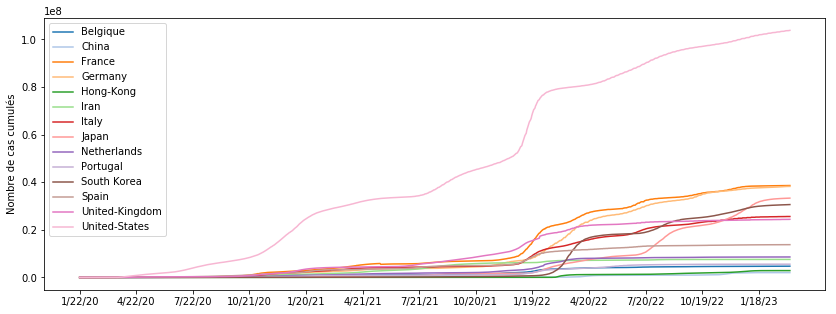

In [85]:
fig, ax = plt.subplots(figsize=(14, 5))
plotcumul(dataBel,liste_dates,'Belgique',ax)
plotcumul(dataChi,liste_dates,'China',ax)
plotcumul(dataFra,liste_dates,'France',ax)
plotcumul(dataGer,liste_dates,'Germany',ax)
plotcumul(dataHK,liste_dates,'Hong-Kong',ax)
plotcumul(dataIra,liste_dates,'Iran',ax)
plotcumul(dataIta,liste_dates,'Italy',ax)
plotcumul(dataJap,liste_dates,'Japan',ax)
plotcumul(dataNeth,liste_dates,'Netherlands',ax)
plotcumul(dataPort,liste_dates,'Portugal',ax)
plotcumul(dataSK,liste_dates,'South Korea',ax)
plotcumul(dataSpa,liste_dates,'Spain',ax)
plotcumul(dataUK,liste_dates,'United-Kingdom',ax)
plotcumul(dataUS,liste_dates,'United-States',ax)

ax.set_xticks(liste_dates[::91])
ax.set_ylabel('Nombre de cas cumulés')
ax.legend()
plt.show()


On passe en représentation logarithmique pour mieux visualiser les données.

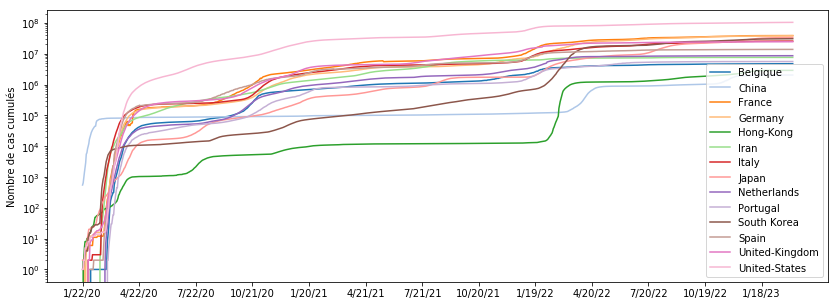

In [86]:
from IPython.display import display
ax.set_yscale("log")
display(fig)